In [ ]:
from openai import OpenAI
from dotenv import load_dotenv
import os
import numpy as np

api_key = os.getenv("GOOGLE_API_KEY")
base_url = "https://generativelanguage.googleapis.com/v1beta/openai/"
client = OpenAI(api_key=api_key, base_url=base_url)

load_dotenv()
api_key = os.getenv("GOOGLE_API_KEY")

def get_embeddings(text):
    response = client.embeddings.create(
        input=text,
        model="embedding-001"  
    )
    embedding = response.data[0].embedding
    return np.array(embedding)

embeddings = np.array(get_embeddings("hi")).astype("float32")

print(embeddings)

[ 1.40444320e-02 -1.17040444e-02 -1.88035406e-02 -4.88927215e-02
  2.25798171e-02 -1.68289039e-02  1.15179112e-02 -1.64172444e-02
  1.12503143e-02  1.19784381e-02  3.11578140e-02  2.53439005e-02
 -4.79628071e-02 -6.33220449e-02 -5.13771921e-03  8.06538668e-03
 -1.76953647e-04  1.74705628e-02  1.35320481e-02 -3.82096991e-02
  3.71206366e-02  2.66671628e-02 -1.77225992e-02 -1.06185442e-03
  3.05675473e-02 -3.29885483e-02  2.46938579e-02 -3.70974950e-02
 -1.61110815e-02  5.72268739e-02 -5.05174287e-02  3.68845016e-02
 -4.74144071e-02  2.24587042e-02  4.05303277e-02 -7.23513737e-02
  2.66565457e-02  1.21972794e-02  1.65027031e-05  2.79774163e-02
  1.05307689e-02 -6.08645119e-02 -4.45794836e-02 -2.96627674e-02
  7.63400570e-02  9.66954883e-03 -1.07411062e-03 -2.35289149e-03
  1.26940133e-02 -7.90405273e-02  6.46368638e-02  2.67661978e-02
  5.46583980e-02 -3.09687778e-02 -1.95411285e-05 -2.77452208e-02
  5.65548725e-02  3.69062498e-02 -5.51359318e-02  6.57682214e-03
  1.61673855e-02 -5.33442

row = 0. column-wise
 
embeddings = np.array([
    [3, 1],
    [4, 2]
])
 
Column 1 norm: √(3² + 4²) = 5
Column 2 norm: √(1² + 2²) = √5 ≈ 2.236
 
output:
 
[
  [3/5, 1/√5],
  [4/5, 2/√5]
]
 
 
row = 1 row-wise
 
Row 1 norm = √(3² + 4²) = 5
Row 2 norm = √(1² + 2²) = √5 ≈ 2.236
 
[
  [3/5, 4/5],
  [1/√5, 2/√5]
] 
 
 

The dimension is determined by the hidden layer size of the model.

Common:

BERT-base → 768

BERT-large → 1024

OpenAI's text-embedding-ada-002 → 1536

GPT models → varies (e.g., 12288 for GPT-4-32k)

In [2]:
# ⬛⬛⬛ Cell 1 – Setup vectors
import numpy as np
import matplotlib.pyplot as plt

# Toy 2-D embeddings
vectors = {
    "I love pizza and pasta": np.array([1.0, 0.2]),
    "My favorite food is spaghetti": np.array([0.8, 0.4]),
    "The car broke down on the highway": np.array([0.1, 1.2])
}

# Query embedding
query = np.array([1.0, 0.3])  # "I like Italian food"

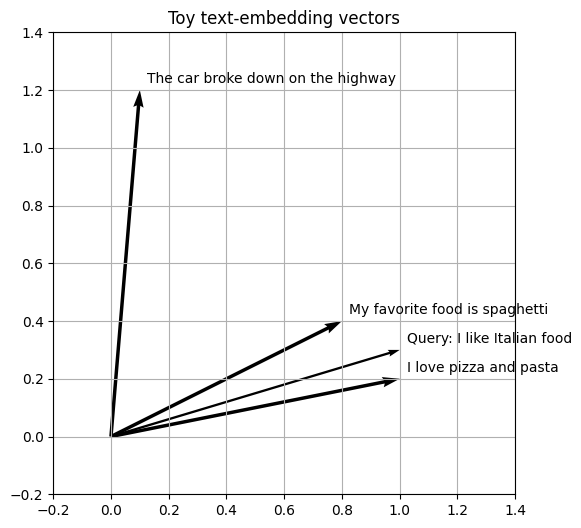

In [3]:
# ⬛⬛⬛ Cell 2 – Plot the arrows
plt.figure(figsize=(6, 6))
ax = plt.gca()

# Show each sentence as an arrow from the origin
for sentence, vec in vectors.items():
    ax.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1)
    ax.annotate(sentence, (vec[0], vec[1]), xytext=(5, 5), textcoords='offset points')

# Query arrow (slightly bolder)
ax.quiver(0, 0, query[0], query[1], angles='xy', scale_units='xy', scale=1, width=0.005)
ax.annotate("Query: I like Italian food", (query[0], query[1]), xytext=(5, 5), textcoords='offset points')

ax.set_xlim(-0.2, 1.4); ax.set_ylim(-0.2, 1.4)
ax.set_aspect('equal', 'box'); ax.grid(True)
plt.title("Toy text-embedding vectors")
plt.show()
